In [1]:
import pickle
import numpy as np
from load_pickle import get_outputs
from itertools import product
import matplotlib.pyplot as plt
from scipy import io
from scipy import stats
import pandas as pd
import seaborn as sns

from scipy.stats import mannwhitneyu, normaltest
from statannotations.Annotator import Annotator
from utils import *

%matplotlib inline

data_folder = '/Users/kendranoneman/Projects/mayo/data/neural-decoding/outpickles/'
fig_folder='/Users/kendranoneman/Projects/mayo/NeuralDecoding/figures/' 

colors2 = ['purple', 'blue','cyan','mediumaquamarine','green','yellowgreen','gold','orange', 'magenta', 'red','gray'] #Colors to plot each method
colors = ['mediumorchid','seagreen','cornflowerblue']
ill=0 #Whether I am making these plots for exporting to adobe illustrator (in which case I remove the text)

In [2]:
def get_outputs(result_dir,load_folder):
    num_folds = int(result_dir[35:37])
    num_repeats = int(result_dir[-5:-1])
    
    pairs = list(product(range(num_folds), range(num_repeats)))
    
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,time_elapsed,max_params,neuron_inds = [],[],[],[],[],[],[],[],[]
    for j in range(len(pairs)):
        with open(data_folder+result_dir+'fo'+str(pairs[j][0])+'_re'+str(pairs[j][1])+'.pickle','rb') as f:
            y_train0,y_test0,y_train_pred0,y_test_pred0,r2s,rhs,te,params,ninds=pickle.load(f,encoding='latin1')
            y_train.append(y_train0)
            y_test.append(y_test0)
            y_train_pred.append(y_train_pred0)
            y_test_pred.append(y_test_pred0)
            R2s.append(r2s)
            rhos.append(rhs)
            time_elapsed.append(te)
            max_params.append(params)
            neuron_inds.append(ninds)
    
    return y_train, y_test, y_train_pred, y_test_pred, R2s, rhos, time_elapsed, max_params, neuron_inds

In [3]:
# Wiener Filter
y_test_pred_wf,R2s_wf,rhos_wf,te_wf = [],[],[],[]
data_dirs = ['s00-t0-d050-m00-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m00-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m00-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_wf.append(y_test_pred)
    R2s_wf.append(R2s)
    rhos_wf.append(rhos)
    te_wf.append(te)

# Wiener Cascade
y_test_pred_wc,R2s_wc,rhos_wc,te_wc = [],[],[],[]
data_dirs = ['s00-t0-d050-m01-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m01-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m01-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_wc.append(y_test_pred)
    R2s_wc.append(R2s)
    rhos_wc.append(rhos)
    te_wc.append(te)
    
# XGBoost
y_test_pred_xgb,R2s_xgb,rhos_xgb,te_xgb = [],[],[],[]
data_dirs = ['s00-t0-d050-m02-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m02-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m02-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_xgb.append(y_test_pred)
    R2s_xgb.append(R2s)
    rhos_xgb.append(rhos)
    te_xgb.append(te)
    
# SVR
y_test_pred_svr,R2s_svr,rhos_svr,te_svr = [],[],[],[]
data_dirs = ['s00-t0-d050-m03-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m03-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m03-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_svr.append(y_test_pred)
    R2s_svr.append(R2s)
    rhos_svr.append(rhos)
    te_svr.append(te)
    
# DNN
y_test_pred_dnn,R2s_dnn,rhos_dnn,te_dnn = [],[],[],[]
data_dirs = ['s00-t0-d050-m04-o0-nm24-nf00-bn0-fo10-fi03-r0010/','s00-t0-d050-m04-o0-nm00-nf24-bn0-fo10-fi03-r0010/','s00-t0-d050-m04-o0-nm12-nf12-bn0-fo10-fi03-r0010/']
for i in range(len(data_dirs)):
    y_train,y_test,y_train_pred,y_test_pred,R2s,rhos,te,mp,ni = get_outputs(data_dirs[i],data_folder)
    y_test_pred_dnn.append(y_test_pred)
    R2s_dnn.append(R2s)
    rhos_dnn.append(rhos)
    te_dnn.append(te)

In [4]:
# MT only
vals = []
vals = pd.DataFrame(np.hstack((R2s_wf[0],R2s_wc[0],R2s_xgb[0],R2s_svr[0],R2s_dnn[0])).T, columns = ['r2'])
vals['rho'] = np.hstack((rhos_wf[0],rhos_wc[0],rhos_xgb[0],rhos_svr[0],rhos_dnn[0])).T
vals['time'] = np.hstack((te_wf[0],te_wc[0],te_xgb[0],te_svr[0],te_dnn[0])).T 
vals['model'] = 'abc'
vals['Brain Area'] = 'mt only'
vals.loc[0:99, 'model'] = 'wf'
vals.loc[100:199, 'model'] = 'wc'
vals.loc[200:299, 'model'] = 'xgb'
vals.loc[300:399, 'model'] = 'svr'
vals.loc[400:499, 'model'] = 'dnn'
vals_mt = vals

# FEF only
vals = []
vals = pd.DataFrame(np.hstack((R2s_wf[1],R2s_wc[1],R2s_xgb[1],R2s_svr[1],R2s_dnn[1])).T, columns = ['r2'])
vals['rho'] = np.hstack((rhos_wf[1],rhos_wc[1],rhos_xgb[1],rhos_svr[1],rhos_dnn[1])).T
vals['time'] = np.hstack((te_wf[1],te_wc[1],te_xgb[1],te_svr[1],te_dnn[1])).T 
vals['model'] = 'abc'
vals['Brain Area'] = 'fef only'
vals.loc[0:99, 'model'] = 'wf'
vals.loc[100:199, 'model'] = 'wc'
vals.loc[200:299, 'model'] = 'xgb'
vals.loc[300:399, 'model'] = 'svr'
vals.loc[400:499, 'model'] = 'dnn'
vals_fef = vals

# MT + FEF
vals = []
vals = pd.DataFrame(np.hstack((R2s_wf[2],R2s_wc[2],R2s_xgb[2],R2s_svr[2],R2s_dnn[2])).T, columns = ['r2'])
vals['rho'] = np.hstack((rhos_wf[2],rhos_wc[2],rhos_xgb[2],rhos_svr[2],rhos_dnn[2])).T
vals['time'] = np.hstack((te_wf[2],te_wc[2],te_xgb[2],te_svr[2],te_dnn[2])).T 
vals['model'] = 'abc'
vals['Brain Area'] = 'mt+fef'
vals.loc[0:99, 'model'] = 'wf'
vals.loc[100:199, 'model'] = 'wc'
vals.loc[200:299, 'model'] = 'xgb'
vals.loc[300:399, 'model'] = 'svr'
vals.loc[400:499, 'model'] = 'dnn'
vals_mtfef = vals

good_inds = (vals_fef['r2'] >= 0) & (vals_mt['r2'] >= 0) & (vals_mtfef['r2'] >= 0)

vals_mt = vals_mt[good_inds]
vals_fef = vals_fef[good_inds]
vals_mtfef = vals_mtfef[good_inds]

df = pd.concat([vals_mt, vals_fef, vals_mtfef],    # Combine vertically
                ignore_index = True,
                sort = False)

df['time'] = df['time']/60


#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(df)


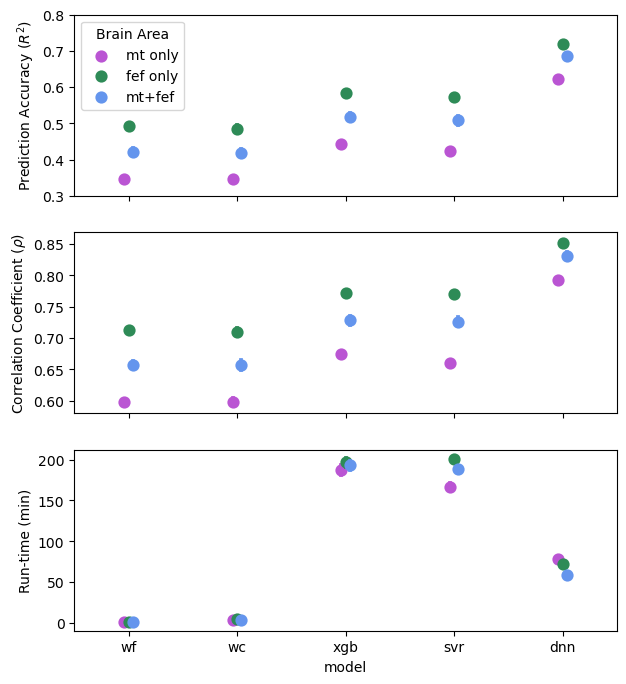

In [5]:
fig, axes = plt.subplots(3,1,figsize=(7,8)) #Create figure (11 rows by 3 columns)

m = 0
a = sns.pointplot(ax=axes[m],data=df,x="model",y="r2",hue="Brain Area",join=False,palette=colors,errorbar='se',dodge=True)
a.set(ylim=(0.3, 0.8))
a.set(ylabel='Prediction Accuracy ($R^2$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
#a.get_legend().remove()

#fig.legend(bbox_to_anchor=(0.9,0.5), loc="center left")

m=m+1
a = sns.pointplot(ax=axes[m],data=df,x="model",y="rho",hue="Brain Area",join=False,palette=colors,errorbar='se',dodge=True)
#a.set(ylim=(0.3, 0.8))
a.set(ylabel=r'Correlation Coefficient ($\rho$)')
#a.set(title='MT only')
a.set(xticklabels=[])
a.set(xlabel=None)
a.get_legend().remove()

m=m+1
a = sns.pointplot(ax=axes[m],data=df,x="model",y="time",hue="Brain Area",join=False,palette=colors,errorbar='se',dodge=True)
#a.set(ylim=(0.3, 0.8))
a.set(ylabel='Run-time (min)')
#a.set(title='MT only')
#a.set(xticklabels=[])
a.get_legend().remove()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

wc_fef only vs. wc_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:1.270e-13 U_stat=6.774e+03
xgb_mt only vs. xgb_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:2.562e-34 U_stat=0.000e+00
xgb_fef only vs. xgb_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:6.625e-14 U_stat=8.068e+03
svr_mt only vs. svr_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:3.243e-34 U_stat=8.000e+00
svr_fef only vs. svr_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:6.750e-14 U_stat=8.067e+03
dnn_mt only vs. dnn_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:3.130e-33 U_stat=8.400e+01
dnn_fef only vs. dnn_mt+fef: Mann-Whitney-Wilcoxon test two-sided, P_val:1.524e-07 U_stat=7.149e+03
wf_mt only vs. wf_fef only: Mann-Whitney-Wilcoxon test two-sided, P_val:2.345e-34 U_stat=0.000e+00
wf_fef only vs. wf_

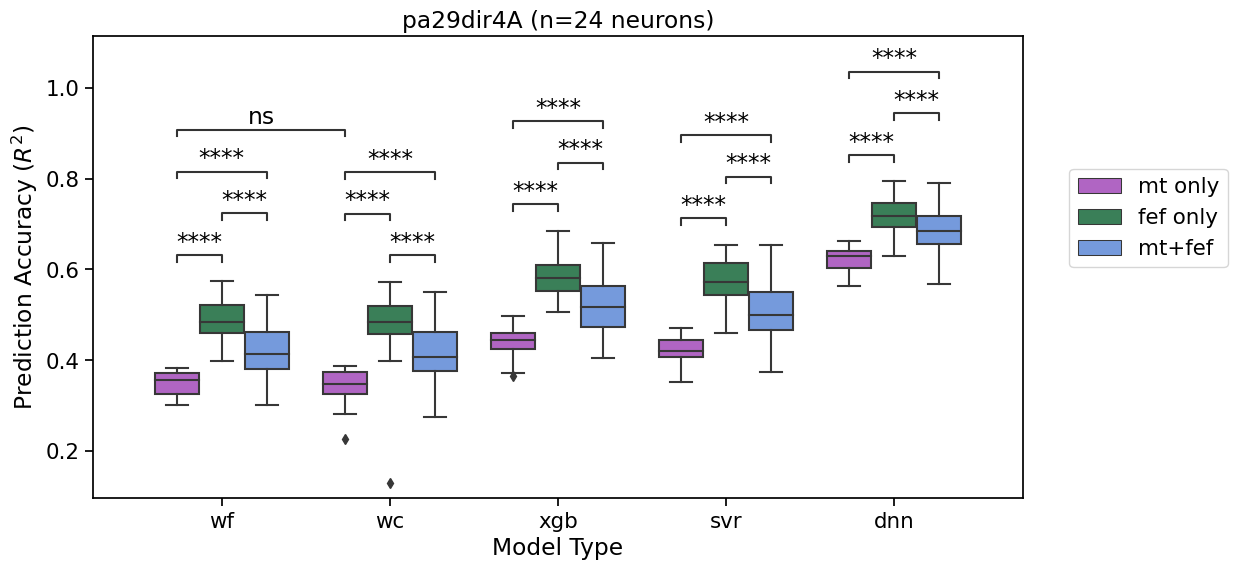

In [11]:
pairs = [
    [('wf', 'mt only'), ('wf', 'fef only')],
    [('wf', 'mt only'), ('wf', 'mt+fef')],
    [('wf', 'fef only'), ('wf', 'mt+fef')],

    [('wc', 'mt only'), ('wc', 'fef only')],
    [('wc', 'mt only'), ('wc', 'mt+fef')],
    [('wc', 'fef only'), ('wc', 'mt+fef')],

    [('xgb', 'mt only'), ('xgb', 'fef only')],
    [('xgb', 'mt only'), ('xgb', 'mt+fef')],
    [('xgb', 'fef only'), ('xgb', 'mt+fef')],
    
    [('svr', 'mt only'), ('svr', 'fef only')],
    [('svr', 'mt only'), ('svr', 'mt+fef')],
    [('svr', 'fef only'), ('svr', 'mt+fef')],
    
    [('dnn', 'mt only'), ('dnn', 'fef only')],
    [('dnn', 'mt only'), ('dnn', 'mt+fef')],
    [('dnn', 'fef only'), ('dnn', 'mt+fef')],
    
    [('wf', 'mt only'), ('wc', 'mt only')]
]


hue_plot_params = {
    'data': df,
    'x': 'model',
    'y': 'r2',
    "hue": "Brain Area",
    "palette": colors
}

with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    ax = sns.boxplot(ax=ax, **hue_plot_params)

    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="Mann-Whitney").apply_and_annotate()

    add_legend(ax)
    ax.set(xlabel='Model Type')
    ax.set(ylabel='Prediction Accuracy ($R^2$)')
    ax.set(title='pa29dir4A (n=24 neurons)')
    
    plt.savefig(fig_folder+'ffmodels_r2_pa29dir4A.png', dpi=300, bbox_inches='tight')
    plt.show()
    


In [ ]:
mt_wf = df.loc[(df['Brain Area']=='mt only') & (df['model']=='wf'), "r2"].values
fef_wf =  df.loc[(df['Brain Area']=='fef only') & (df['model']=='wf'), "r2"].values
mtfef_wf = df.loc[(df['Brain Area']=='mt+fef') & (df['model']=='wf'), "r2"].values

stat_results = [
  mannwhitneyu(mt_wf, fef_wf, alternative="two-sided"),
  mannwhitneyu(fef_wf, mtfef_wf, alternative="two-sided"),
  mannwhitneyu(mt_wf, mtfef_wf, alternative="two-sided")
]

pvalues = [result.pvalue for result in stat_results]

print("MT vs FEF: \n", stat_results[0], "\n")
print("FEF vs MT+FEF: \n", stat_results[1], "\n")
print("MT vs MT+FEF: \n", stat_results[2], "\n")

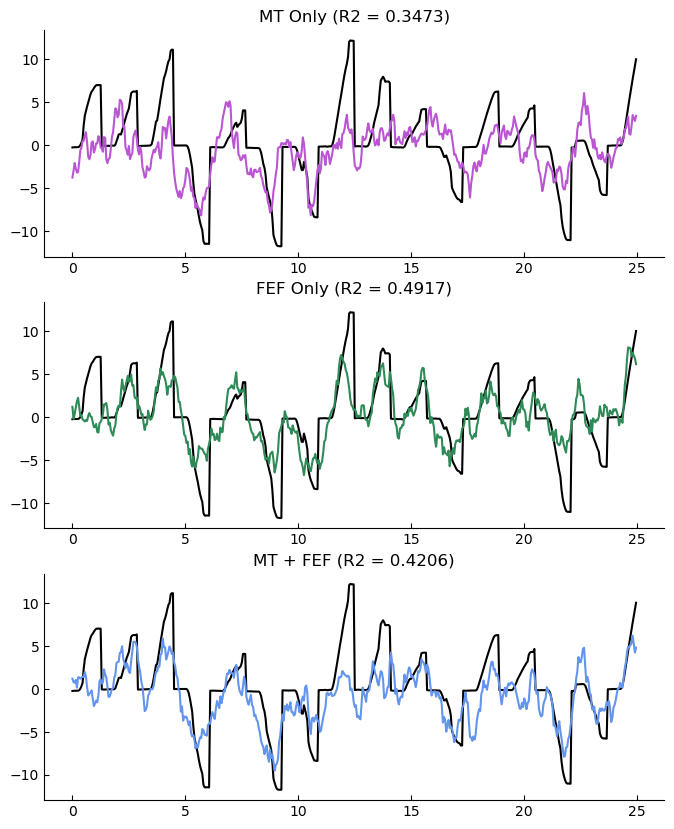

In [10]:
ts=np.arange(0,500) #Plot samples 500-800
samp = 4

fig_traces, ax = plt.subplots(3,1,figsize=(8,10)) #Create figure (11 rows by 3 columns)

m=0 #Initialize method number. This corresponds to the row we're currently plotting in.
x = (ts*50)/1000

#WF (mix FEF + MT)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[0][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('MT Only (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 

#WF (FEF only)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[1][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('FEF Only (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1

#WF (MT only)
ax[m].plot(x,np.array(y_test[samp])[ts,0],'k') #Plot actual
ax[m].plot(x,np.array(y_test_pred_wf[2][0])[ts,0],colors[m]) #Plot predictions, in color specified in user options section
ax[m].tick_params(direction='in') #Make ticks inward
ax[m].set_title('MT + FEF (R2 = {:.4f})'.format(np.mean(R2s_wf[m])))
#ax[m].set_ylim([-100,100])
#ax[m].set_yticks(np.arange(-100,100.1,50))
#ax[m].set_xlim([0,t_len]) #Set x limit
ax[m].spines['right'].set_color('none') #Remove right boundary
ax[m].spines['top'].set_color('none') #Remove top boundary
if ill:
    ax[m].set_xticklabels('')
    ax[m].set_yticklabels('')
m=m+1 #Increase method index, so the next method gets plotted on the next row

